In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
sb.set_style('whitegrid')


In [143]:
data = pd.read_csv('/content/medical_Insurance_Kagle.csv')
pd.set_option('display.max_columns' ,None)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [144]:
# creating a function which will give us features from the dataset
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    print("DATA TYPES OF THE DATA: ")
    print(dataset.dtypes)
    print("-"*90)
    
data_feature(data)


SHAPE OF THE DATA: 
(1338, 7)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
------------------------------------------------------------------------------------------
NUMBER OF NULL VALUES PRESENT IN THE DATA: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
----------------------------------------------------------------------------------

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [146]:
# Categorical variables :
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [147]:
# Numerical variables :
num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [148]:
print(f'The categorical features from the data : {cat_cols}')
print(f'The numerical features from the data : {num_cols}')

The categorical features from the data : ['sex', 'smoker', 'region']
The numerical features from the data : ['age', 'bmi', 'children', 'charges']


In [149]:
# find missing values
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")


No missing value found


In [150]:
# unique categories in each categorical variable :

for i in cat_cols :
  print(f"The unique categories in {i} : {data[i].unique()}")
  print('*'*90)

The unique categories in sex : ['female' 'male']
******************************************************************************************
The unique categories in smoker : ['yes' 'no']
******************************************************************************************
The unique categories in region : ['southwest' 'southeast' 'northwest' 'northeast']
******************************************************************************************


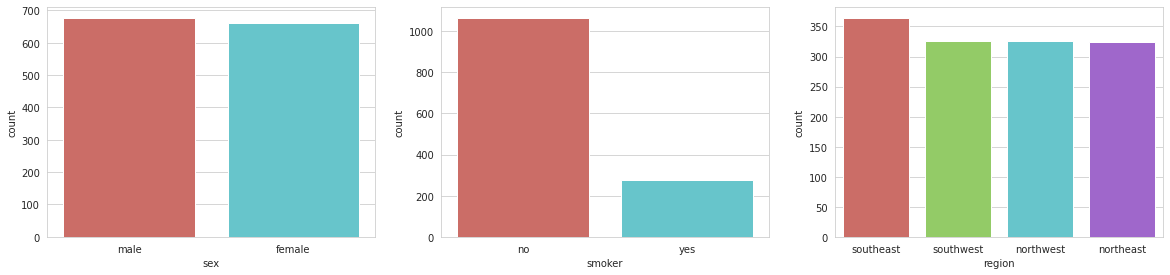

In [151]:
#plot a univariate distribution of categorical  observations :
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for cat_col in cat_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(data = data , x = data[cat_col] ,order = data[cat_col].value_counts().index , palette="hls")
    plt.xlabel(cat_col)
    plotnumber+=1
plt.show()


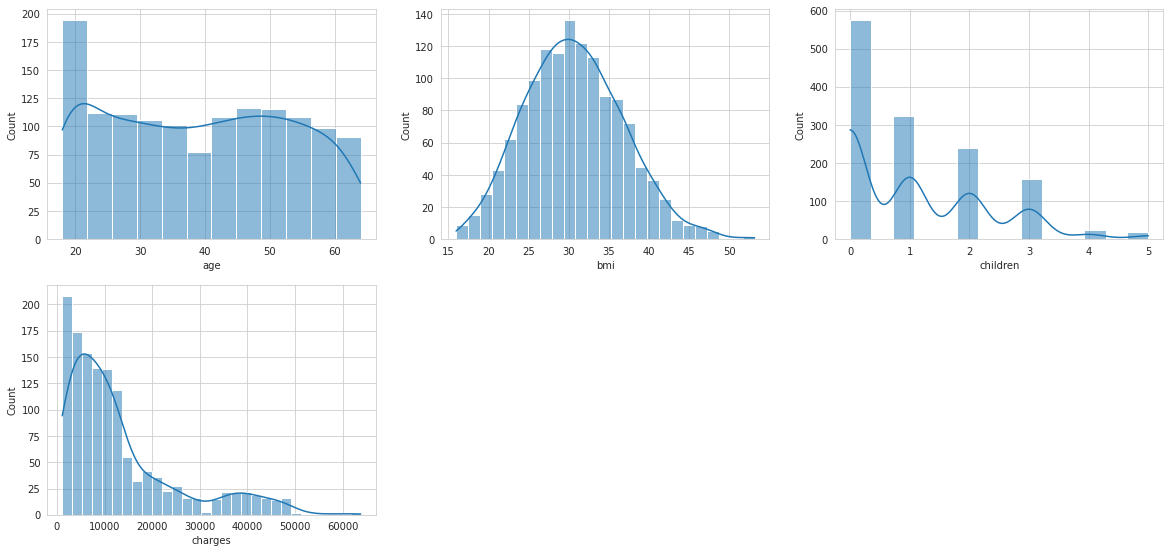

In [152]:
#plot a univariate distribution of numerical observations :

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_col in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(data = data , x = data[num_col] , kde = True)
    plt.xlabel(num_col)
    plotnumber+=1
plt.show()


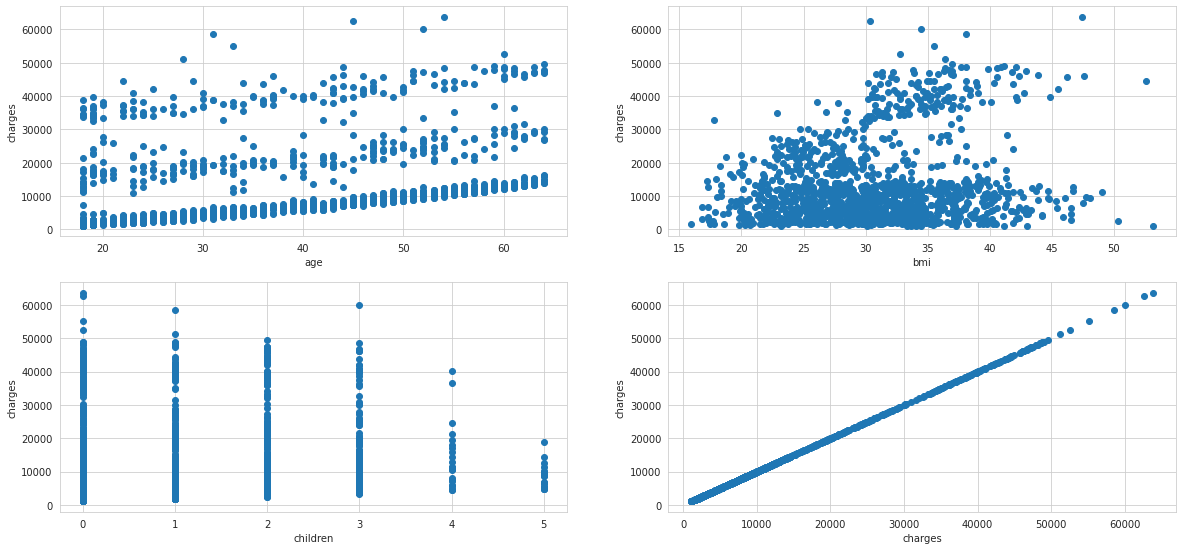

In [153]:
# Relation between numerical Features and target :

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_cols:
    df=data.copy()
    ax = plt.subplot(12,2,plotnumber)
    plt.scatter(df[feature],df['charges'])
    plt.xlabel(feature)
    plt.ylabel('charges')
    #plt.title(feature)
    plotnumber+=1
plt.show()


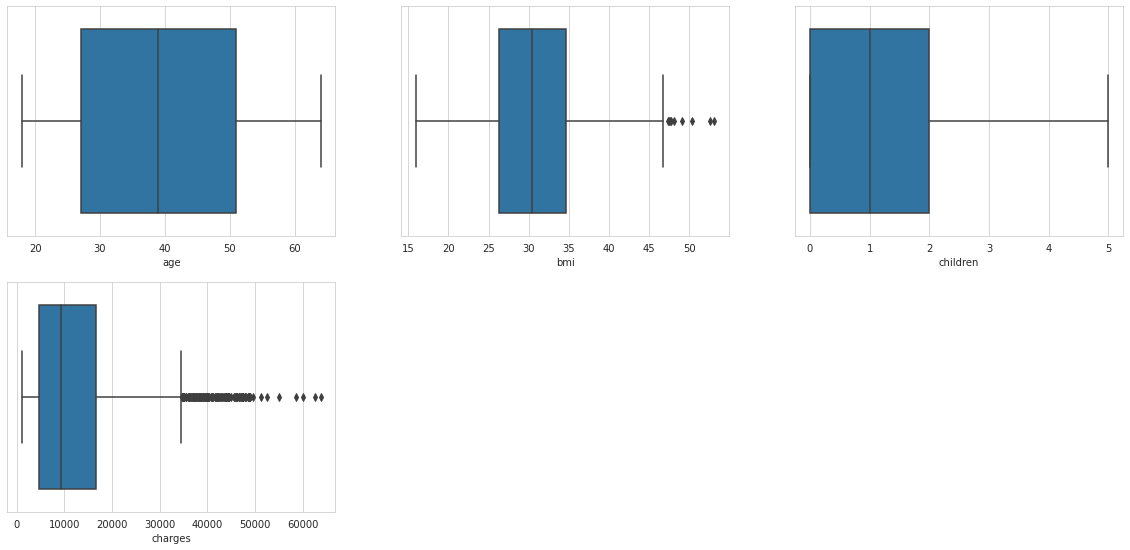

In [154]:
#boxplot on numerical features to find outliers :
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data = data , x = data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()
 


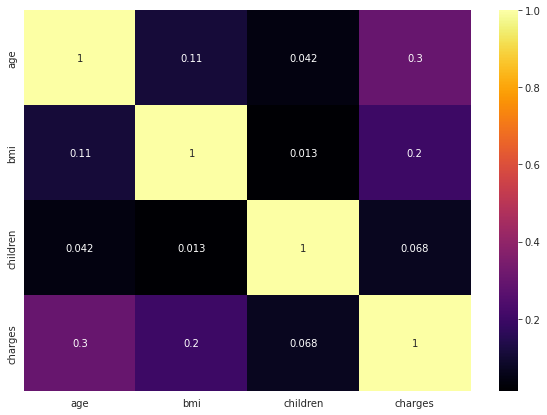

In [155]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

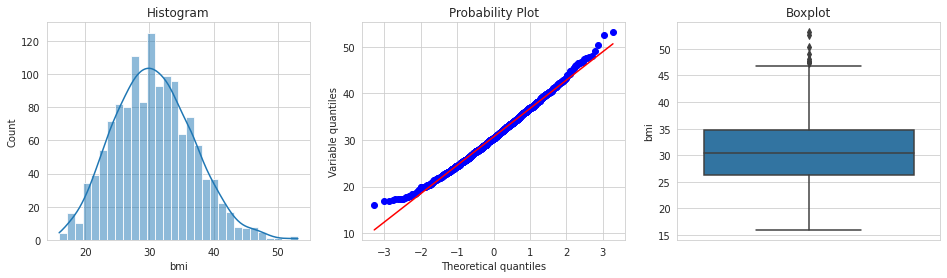

In [156]:
# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30,kde = True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


diagnostic_plots(data, 'bmi')

In [157]:
# Since 'bmi' follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers :

uppper_boundary=data['bmi'].mean() + 3* data['bmi'].std()
lower_boundary=data['bmi'].mean() - 3* data['bmi'].std()
print(lower_boundary)
print(uppper_boundary)
data['bmi'].mean()

12.368836125949485
48.95795759602359


30.663396860986538

In [158]:
data.loc[data['bmi']>=48,'bmi']=48

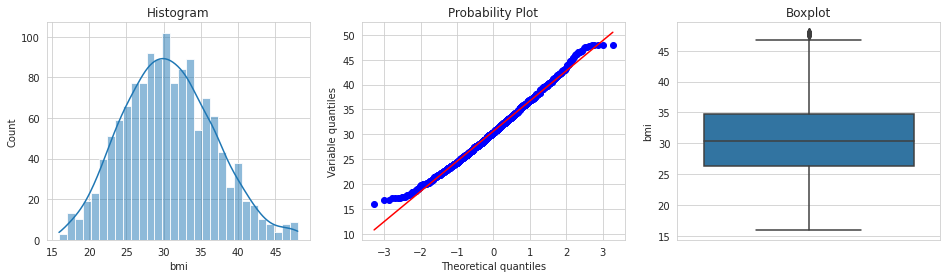

In [159]:
diagnostic_plots(data, 'bmi')

In [160]:
print(data.shape)
print(data.head())

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [161]:
df = data.copy()

In [162]:
df.shape

(1338, 7)

In [163]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
df_get = pd.get_dummies(data = df,columns = ['sex', 'smoker', 'region'],drop_first=True)
df_get.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [167]:
df_get.shape

(1338, 9)

In [168]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [169]:
X = df_get.drop(['charges'],axis = 1)
y = df_get['charges']

In [170]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [171]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [172]:
X.shape,y.shape

((1338, 8), (1338,))

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [174]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [176]:
X_train_sc.shape , X_test_sc.shape , X.shape

((1070, 8), (268, 8), (1338, 8))

In [179]:
def model_performance(model,model_name,x_train = X_train_sc,y_train = y_train,x_test = X_test_sc,y_test = y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    Training_Score = np.round(model.score(x_train,y_train),3)
    Testing_Score = np.round(model.score(x_test,y_test),3)
    
    mse_training = np.round(mean_squared_error(y_train,y_train_pred),3)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),3)
    
    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),3)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),3)
    
    r2_training = np.round(r2_score(y_train,y_train_pred),3)
    r2_testing = np.round(r2_score(y_test,y_test_pred),3)
    
    
    print("Model Performance for:",model_name)
    print("")
    
    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("")
    
    print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    print("")
    
    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("")
    
    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("")
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    return Training_Score,Testing_Score,mse_training,mse_testing,mae_training,mae_testing,r2_training,r2_testing

In [180]:
# Linear Regression :

model1 = LinearRegression()
model1.fit(X_train_sc,y_train)

LinearRegression()

Model Performance for: LinearRegression()

Training Score: 0.752
Testing Score: 0.746

Training Data Mean Squared Error: 36113742.545
Testing Data Mean Squared Error: 38212335.7

Training Data Mean Absolute Error: 4140.613
Testing Data Mean Absolute Error: 4275.33

Training Data r2_score: 0.752
Testing Data r2_score: 0.746

Residual Analysis:


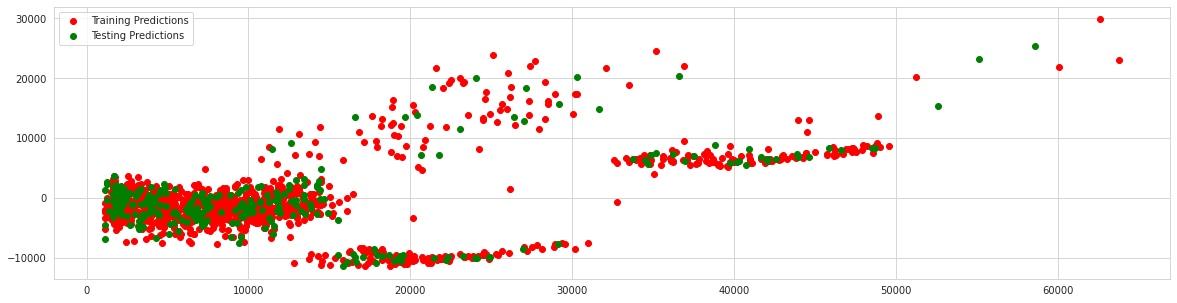

In [181]:
Linear_regression_performance = model_performance(model1,model_name = model1)

In [182]:
#Ridge :
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Ridge(),param_grid = param_grid,cv=4)
grid.fit(X,y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': array([3.65387852e-01, 7.01553683e-01, 6.43910733e-01, 9.19611796e-01,
       1.92187841e-01, 7.71210907e-01, 6.81058782e-01, 3.95177596e-01,
       3.04965907e-01, 7.72082929e-01, 8.81944377e-01, 6.12618885e-01,
       9.51543810e-01, 7.58950701e-01, 3.47656278e-01, 5.60105715e-02,
       7.24916232e-04, 3.02329108e-02, 9.16792530e-01, 5....
       9.23561940e-03, 4.71199082e-01, 9.39257804e-02, 9.77577187e-01,
       9.16236767e-01, 1.16851398e-01, 5.18327067e-01, 5.98860898e-01,
       7.45205255e-01, 4.68454828e-01, 2.04915512e-01, 2.89378977e-01,
       3.09958081e-02, 6.80237362e-01, 3.28994218e-01, 1.82429571e-01,
       4.80170436e-01, 8.95076055e-01, 9.52301854e-01, 9.02004734e-01,
       2.02128535e-01, 2.99147139e-01, 8.55121178e-01, 7.08263070e-01])})

In [183]:
model2 = grid.best_estimator_
model2.fit(X_train_sc,y_train)

Ridge(alpha=0.0007249162319742375)

Model Performance for: Ridge(alpha=0.0007249162319742375)

Training Score: 0.752
Testing Score: 0.746

Training Data Mean Squared Error: 36113742.546
Testing Data Mean Squared Error: 38212335.948

Training Data Mean Absolute Error: 4140.614
Testing Data Mean Absolute Error: 4275.33

Training Data r2_score: 0.752
Testing Data r2_score: 0.746

Residual Analysis:


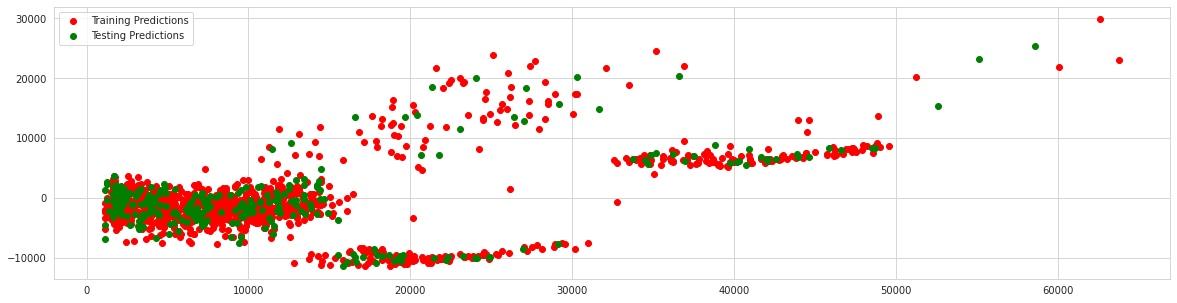

In [184]:
Ridge_performance = model_performance(model2,model_name = model2)

In [185]:
# Lasso :

param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Lasso(),param_grid = param_grid,cv=4)
grid.fit(X,y)


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': array([0.91650209, 0.49579888, 0.72023514, 0.37268819, 0.20176318,
       0.51336664, 0.25112716, 0.38774756, 0.3694433 , 0.93513082,
       0.97379617, 0.6434509 , 0.28838772, 0.53125717, 0.58334566,
       0.94776862, 0.91263032, 0.65303088, 0.27918586, 0.00277755,
       0.12194485, 0.77102171, 0.57288481, 0.09491169, 0.43620149,
       0.0676445 , 0.35...
       0.40287488, 0.60421959, 0.42699915, 0.37192305, 0.29544068,
       0.66998251, 0.64453911, 0.75550984, 0.64845283, 0.04045804,
       0.16271769, 0.71141947, 0.82824373, 0.42600386, 0.24665889,
       0.9732551 , 0.9496959 , 0.01913046, 0.71568556, 0.16819223,
       0.53063335, 0.72025147, 0.66373993, 0.78012727, 0.34276142,
       0.02579336, 0.60141201, 0.5865904 , 0.56838692, 0.74983024,
       0.88672797, 0.16760582, 0.76493119, 0.77842491, 0.21271999])})

In [186]:
model3 = grid.best_estimator_
model3.fit(X_train_sc,y_train)

Lasso(alpha=0.9939742457540537)

Model Performance for: Lasso(alpha=0.9939742457540537)

Training Score: 0.752
Testing Score: 0.746

Training Data Mean Squared Error: 36113758.368
Testing Data Mean Squared Error: 38213595.718

Training Data Mean Absolute Error: 4140.604
Testing Data Mean Absolute Error: 4274.831

Training Data r2_score: 0.752
Testing Data r2_score: 0.746

Residual Analysis:


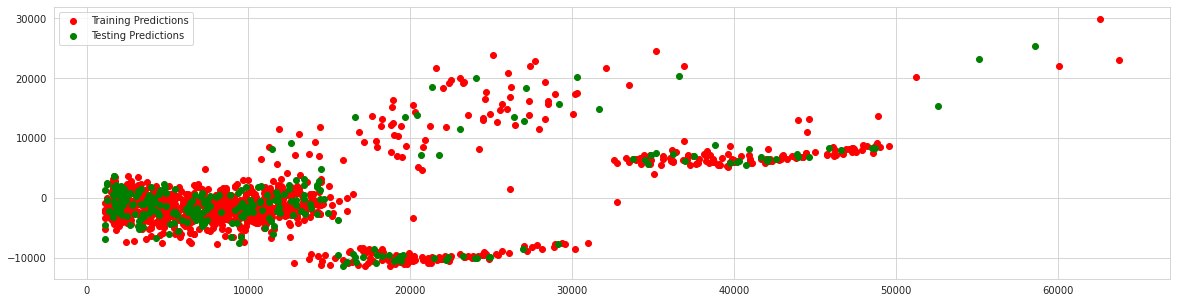

In [187]:
Lasso_performance = model_performance(model3,model_name = model3)

In [188]:
# Decision Tree Regressor :

param_grid = {'max_depth':np.arange(1,10),'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
grid = GridSearchCV(DecisionTreeRegressor(),param_grid = param_grid,cv=4)
grid.fit(X,y)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [189]:
model4 = grid.best_estimator_
model4.fit(X_train_sc,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

Model Performance for: DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

Training Score: 0.877
Testing Score: 0.867

Training Data Mean Squared Error: 17862998.839
Testing Data Mean Squared Error: 19968580.574

Training Data Mean Absolute Error: 2432.835
Testing Data Mean Absolute Error: 2487.516

Training Data r2_score: 0.877
Testing Data r2_score: 0.867

Residual Analysis:


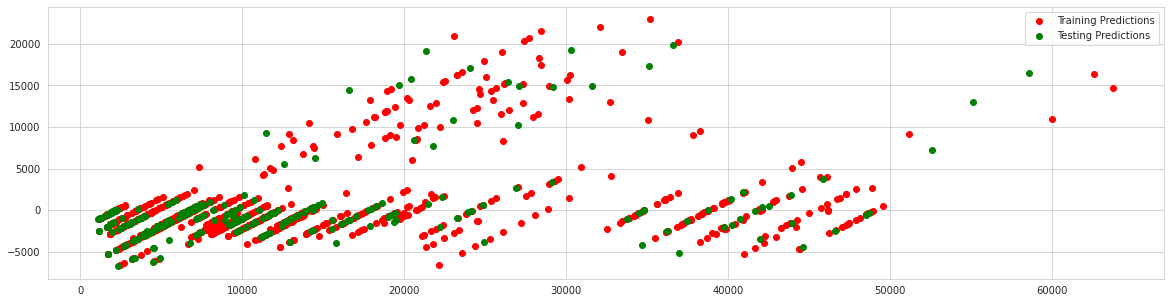

In [190]:
Decision_Tree_performance = model_performance(model4,model_name = model4)

In [191]:
# Random Forest Regressor :
model5 = RandomForestRegressor(max_depth=4,min_samples_split=2,min_samples_leaf = 2)
model5.fit(X_train_sc,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=2)

Model Performance for: RandomForestRegressor(max_depth=4, min_samples_leaf=2)

Training Score: 0.874
Testing Score: 0.865

Training Data Mean Squared Error: 18394630.955
Testing Data Mean Squared Error: 20219748.756

Training Data Mean Absolute Error: 2422.965
Testing Data Mean Absolute Error: 2447.298

Training Data r2_score: 0.874
Testing Data r2_score: 0.865

Residual Analysis:


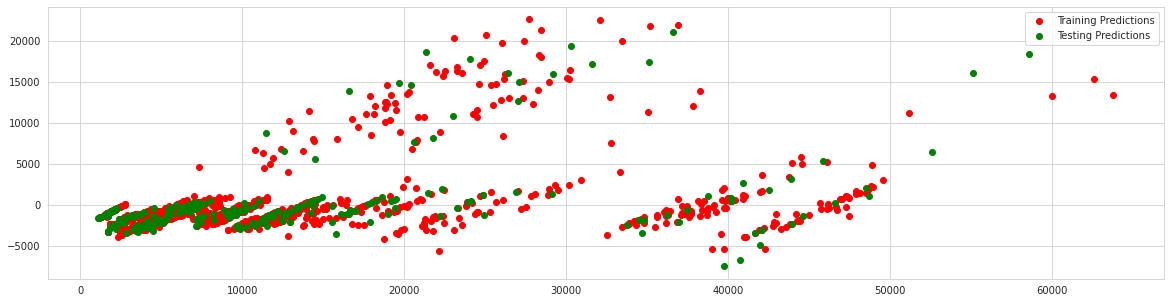

In [192]:
Random_Forest_performance = model_performance(model5,model_name = model5)

In [194]:
# AdaBoost Regressor :

model6 = AdaBoostRegressor(RandomForestRegressor(max_depth=4,min_samples_split=2,min_samples_leaf = 2))
model6.fit(X_train_sc,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=4,
                                                       min_samples_leaf=2))

Model Performance for: AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=4,
                                                       min_samples_leaf=2))

Training Score: 0.855
Testing Score: 0.842

Training Data Mean Squared Error: 21056432.09
Testing Data Mean Squared Error: 23711226.626

Training Data Mean Absolute Error: 3547.63
Testing Data Mean Absolute Error: 3638.732

Training Data r2_score: 0.855
Testing Data r2_score: 0.842

Residual Analysis:


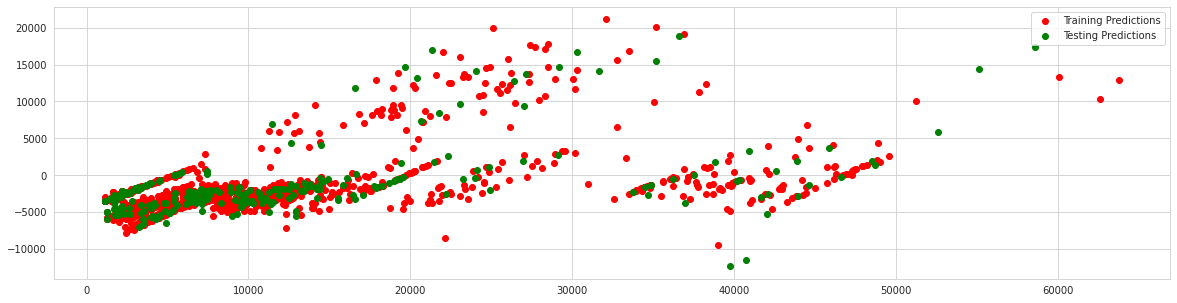

In [195]:
AdaBoost_performance = model_performance(model6,model_name = model6)

In [196]:
# Looking at Model Performane :

model_performance = [["Linear Regression",Linear_regression_performance[0],Linear_regression_performance[1],Linear_regression_performance[2],Linear_regression_performance[3],Linear_regression_performance[4],Linear_regression_performance[5],Linear_regression_performance[6],Linear_regression_performance[7]],
                     ["Ridge",Ridge_performance[0],Ridge_performance[1],Ridge_performance[2],Ridge_performance[3],Ridge_performance[4],Ridge_performance[5],Ridge_performance[6],Ridge_performance[7]],
                     [ "Lasso",Lasso_performance[0],Lasso_performance[1],Lasso_performance[2],Lasso_performance[3],Lasso_performance[4],Lasso_performance[5],Lasso_performance[6],Lasso_performance[7]],
                     ["Decision Tree",Decision_Tree_performance[0],Decision_Tree_performance[1],Decision_Tree_performance[2],Decision_Tree_performance[3],Decision_Tree_performance[4],Decision_Tree_performance[5],Decision_Tree_performance[6],Decision_Tree_performance[7]],
                     ["Random Forest",Random_Forest_performance[0],Random_Forest_performance[1],Random_Forest_performance[2],Random_Forest_performance[3],Random_Forest_performance[4],Random_Forest_performance[5],Random_Forest_performance[6],Random_Forest_performance[7]],
                     ["Adaoost",AdaBoost_performance[0],AdaBoost_performance[1],AdaBoost_performance[2],AdaBoost_performance[3],AdaBoost_performance[4],AdaBoost_performance[5],AdaBoost_performance[6],AdaBoost_performance[7]]]

In [197]:
performance = pd.DataFrame(model_performance,columns = ['Model_Name',"Train Score","Test Score","Train MSE",'Test MSE','Train MAE',"Test MAE","Train R2","Test R2"])

In [199]:
display(performance)

,Model_Name,Train Score,Test Score,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,0.752,0.746,3.611374e+07,3.821234e+07,4140.613,4275.330,0.752,0.746
1,Ridge,0.752,0.746,3.611374e+07,3.821234e+07,4140.614,4275.330,0.752,0.746
2,Lasso,0.752,0.746,3.611376e+07,3.821360e+07,4140.604,4274.831,0.752,0.746
3,Decision Tree,0.877,0.867,1.786300e+07,1.996858e+07,2432.835,2487.516,0.877,0.867
4,Random Forest,0.874,0.865,1.839463e+07,2.021975e+07,2422.965,2447.298,0.874,0.865
5,Adaoost,0.855,0.842,2.105643e+07,2.371123e+07,3547.630,3638.732,0.855,0.842
